In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
df=pd.read_csv(r"C:\Users\User\Desktop\customer-churn\WA_Fn-UseC_-Telco-Customer-Churn (1).csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.shape

(7043, 21)

In [4]:
df.info

<bound method DataFrame.info of       customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0              No  No phone service             DSL 

In [5]:
df["TotalCharges"]=pd.to_numeric(df["TotalCharges"],errors="coerce")
df["TotalCharges"].isnull().sum()

np.int64(11)

In [6]:
df["TotalCharges"] = df["TotalCharges"].fillna(0)

In [7]:
df["TotalCharges"]

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64

In [8]:
df["Churn"].value_counts()
df["Churn"].value_counts(normalize=True)

Churn
No     0.73463
Yes    0.26537
Name: proportion, dtype: float64

In [9]:
df[["tenure", "MonthlyCharges", "TotalCharges"]].describe()

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,2279.734304
std,24.559481,30.090047,2266.794470
min,0.000000,18.250000,0.000000
25%,9.000000,35.500000,398.550000
50%,29.000000,70.350000,1394.550000
75%,55.000000,89.850000,3786.600000
max,72.000000,118.750000,8684.800000


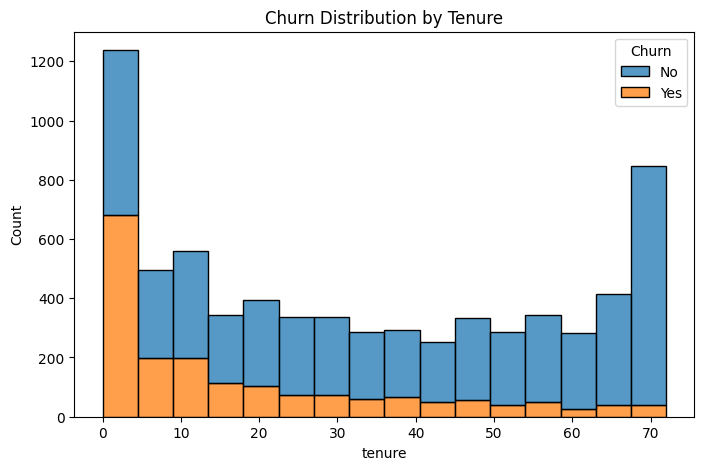

In [10]:
plt.figure(figsize=(8,5))
sns.histplot(data=df, x="tenure", hue="Churn", multiple="stack")
plt.title("Churn Distribution by Tenure")
plt.show()

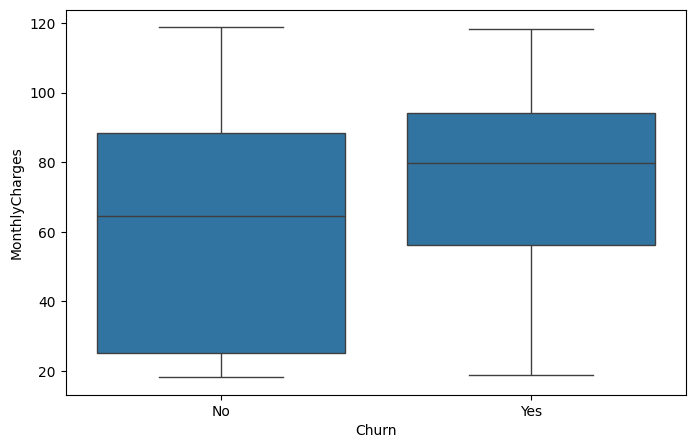

In [11]:
plt.figure(figsize=(8,5))
sns.boxplot(x="Churn", y="MonthlyCharges", data=df)
plt.show()

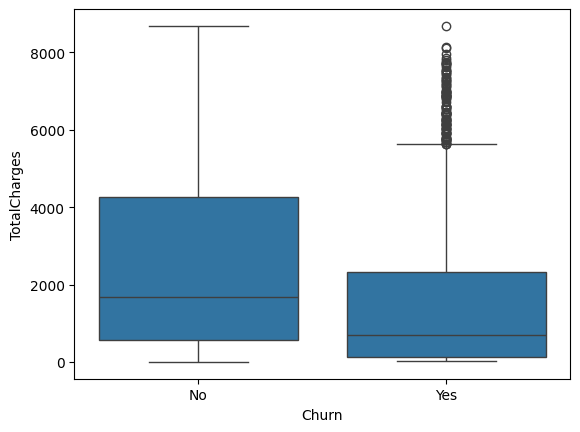

In [12]:
sns.boxplot(x="Churn", y="TotalCharges", data=df)
plt.show()

In [13]:
def churn_by_category(col):
    return pd.crosstab(df[col], df["Churn"], normalize="index") * 100

In [14]:
churn_by_category("Contract")

Churn,No,Yes
Contract,,
Month-to-month,57.290323,42.709677
One year,88.730482,11.269518
Two year,97.168142,2.831858


In [15]:
churn_by_category("InternetService")

Churn,No,Yes
InternetService,,
DSL,81.040892,18.959108
Fiber optic,58.107235,41.892765
No,92.595020,7.404980


In [16]:
churn_by_category("TechSupport")

Churn,No,Yes
TechSupport,,
No,58.364526,41.635474
No internet service,92.595020,7.404980
Yes,84.833659,15.166341


In [17]:
churn_by_category("PaymentMethod")

Churn,No,Yes
PaymentMethod,,
Bank transfer (automatic),83.290155,16.709845
Credit card (automatic),84.756899,15.243101
Electronic check,54.714588,45.285412
Mailed check,80.893300,19.106700


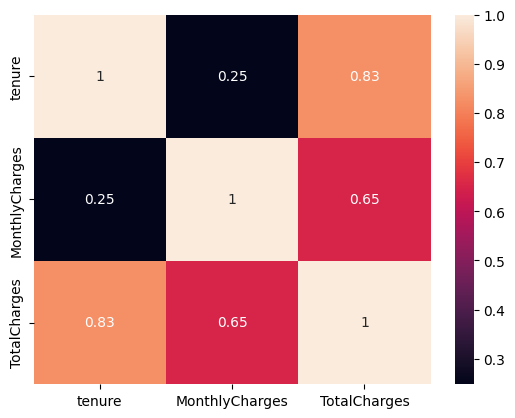

In [18]:
sns.heatmap(df[["tenure", "MonthlyCharges", "TotalCharges"]].corr(), annot=True)
plt.show()

## SUMMARY

## 1.Short-tenure customers churn the most.
## 2.Month-to-month contracts are high risk.
## 3.High monthly charge customers slightly more likely to churn.
## 4.Customers without tech support churn more.
## 5.Electronic check payment users show higher churn.

In [19]:
df["tenure_group"] = pd.cut(
    df["tenure"],
    bins=[0, 12, 24, 48, 72],
    labels=["0-12", "12-24", "24-48", "48+"]
)

In [20]:
services = [
    "PhoneService", "OnlineSecurity", "OnlineBackup",
    "DeviceProtection", "TechSupport",
    "StreamingTV", "StreamingMovies"
]

df["service_count"] = (df[services] == "Yes").sum(axis=1)

In [21]:
df["avg_revenue_per_month"] = df["TotalCharges"] / (df["tenure"] + 1)

In [22]:
contract_map = {
    "Month-to-month": 3,
    "One year": 2,
    "Two year": 1
}

df["contract_risk_score"] = df["Contract"].map(contract_map)

In [23]:
threshold = df["TotalCharges"].quantile(0.75)
df["high_value_customer"] = (df["TotalCharges"] >= threshold).astype(int)

In [24]:
df["auto_payment"] = df["PaymentMethod"].apply(
    lambda x: 1 if "automatic" in x.lower() else 0
)

In [25]:
df["Churn"] = df["Churn"].str.strip()
df["Churn"] = df["Churn"].map({"Yes": 1, "No": 0})

In [26]:
df["Churn"].isnull().sum()

np.int64(0)

In [27]:
df_model = pd.get_dummies(df, drop_first=True)

In [28]:
X = df_model.drop(["Churn"], axis=1)
y = df_model["Churn"]

In [29]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

In [30]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_auc_score, classification_report

In [31]:
log_model = Pipeline([
    ("scaler", StandardScaler()),
    ("model", LogisticRegression(max_iter=1000))
])

log_model.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('model', LogisticRegression(max_iter=1000))])

In [32]:
y_pred_proba = log_model.predict_proba(X_test)[:,1]

roc_auc = roc_auc_score(y_test, y_pred_proba)
print("Logistic Regression ROC-AUC:", roc_auc)

Logistic Regression ROC-AUC: 0.8337699243070088


In [33]:
from sklearn.metrics import classification_report

y_pred = log_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.95      0.87      1035
           1       0.70      0.34      0.46       374

    accuracy                           0.79      1409
   macro avg       0.75      0.65      0.66      1409
weighted avg       0.77      0.79      0.76      1409



In [34]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=300,
    max_depth=8,
    random_state=42
)

rf.fit(X_train, y_train)

rf_probs = rf.predict_proba(X_test)[:,1]

print("Random Forest ROC-AUC:", roc_auc_score(y_test, rf_probs))

Random Forest ROC-AUC: 0.8324291508434731


In [35]:
from xgboost import XGBClassifier

xgb = XGBClassifier(
    n_estimators=400,
    max_depth=4,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    eval_metric="logloss"
)

xgb.fit(X_train, y_train)

xgb_probs = xgb.predict_proba(X_test)[:,1]

print("XGBoost ROC-AUC:", roc_auc_score(y_test, xgb_probs))

XGBoost ROC-AUC: 0.8379575809243328


In [36]:
results = {
    "Logistic Regression": roc_auc,
    "Random Forest": roc_auc_score(y_test, rf_probs),
    "XGBoost": roc_auc_score(y_test, xgb_probs)
}

print(results)

{'Logistic Regression': np.float64(0.8337699243070088), 'Random Forest': np.float64(0.8324291508434731), 'XGBoost': np.float64(0.8379575809243328)}


In [37]:
import matplotlib.pyplot as plt
import pandas as pd

feature_importance = pd.Series(
    xgb.feature_importances_,
    index=X.columns
).sort_values(ascending=False)

feature_importance.head(10)

contract_risk_score               0.208636
Contract_Two year                 0.176546
InternetService_Fiber optic       0.165554
InternetService_No                0.059344
PaymentMethod_Electronic check    0.035666
high_value_customer               0.022501
tenure                            0.022343
StreamingMovies_Yes               0.018703
OnlineSecurity_Yes                0.018487
PaperlessBilling_Yes              0.016062
dtype: float32

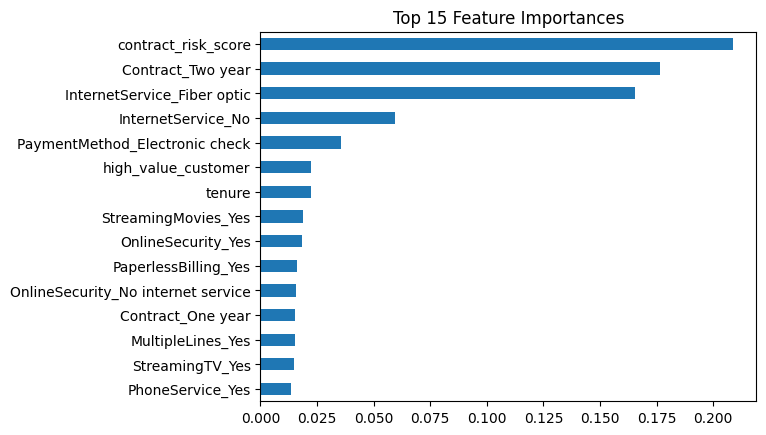

In [38]:
feature_importance.head(15).plot(kind="barh")
plt.gca().invert_yaxis()
plt.title("Top 15 Feature Importances")
plt.show()

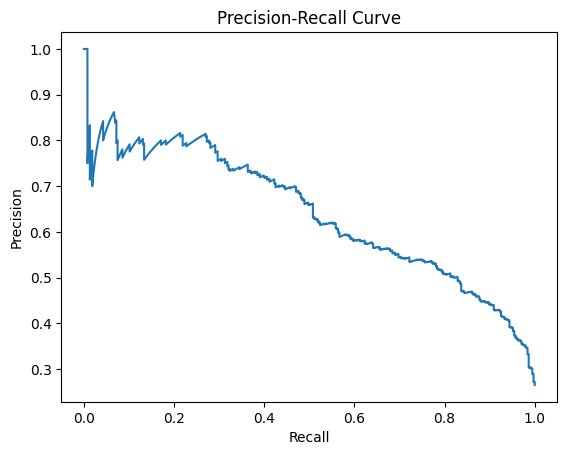

In [39]:
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_test, xgb_probs)

plt.plot(recall, precision)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.show()

In [40]:
y_probs = xgb.predict_proba(X_test)[:,1]

In [41]:
import numpy as np
from sklearn.metrics import confusion_matrix

thresholds = np.arange(0.1, 0.9, 0.05)

results = []

for t in thresholds:
    y_pred = (y_probs >= t).astype(int)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    
    results.append({
        "threshold": t,
        "TP": tp,
        "FP": fp,
        "FN": fn,
        "TN": tn
    })

threshold_df = pd.DataFrame(results)
threshold_df.head()

,threshold,TP,FP,FN,TN
0,0.10,346,485,28,550
1,0.15,328,389,46,646
2,0.20,313,334,61,701
3,0.25,296,278,78,757
4,0.30,282,243,92,792


In [42]:
retention_cost = 500
annual_revenue = 6000
save_rate = 0.6

profits = []

for t in thresholds:
    y_pred = (y_probs >= t).astype(int)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    
    saved_revenue = tp * annual_revenue * save_rate
    cost = (tp + fp) * retention_cost
    net_profit = saved_revenue - cost
    
    profits.append(net_profit)

threshold_df["net_profit"] = profits
threshold_df

,threshold,TP,FP,FN,TN,net_profit
0,0.10,346,485,28,550,830100.0
1,0.15,328,389,46,646,822300.0
2,0.20,313,334,61,701,803300.0
3,0.25,296,278,78,757,778600.0
4,0.30,282,243,92,792,752700.0
5,0.35,261,213,113,822,702600.0
6,0.40,235,174,139,861,641500.0
7,0.45,215,148,159,887,592500.0
8,0.50,192,113,182,922,538700.0
9,0.55,173,75,201,960,498800.0


In [43]:
best_row = threshold_df.loc[threshold_df["net_profit"].idxmax()]
best_row

threshold          0.1
TP               346.0
FP               485.0
FN                28.0
TN               550.0
net_profit    830100.0
Name: 0, dtype: float64

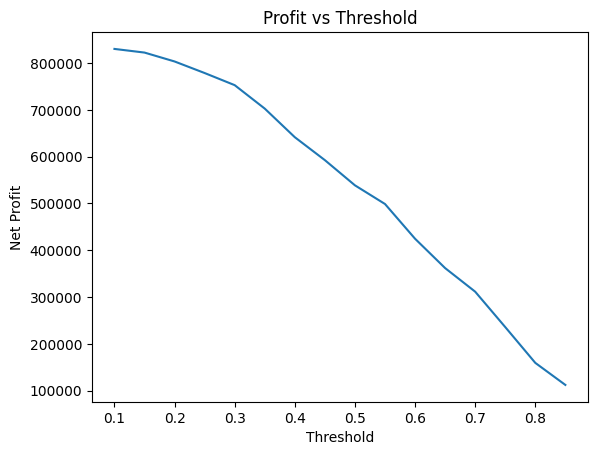

In [44]:
plt.plot(threshold_df["threshold"], threshold_df["net_profit"])
plt.xlabel("Threshold")
plt.ylabel("Net Profit")
plt.title("Profit vs Threshold")
plt.show()

In [45]:
df["Month"] = pd.cut(df["tenure"], bins=12, labels=False)

monthly = df.groupby("Month").agg({
    "customerID": "count",
    "Churn": "sum",
    "MonthlyCharges": "mean"
}).reset_index()

monthly.columns = ["Month", "Active_Customers", "Churned", "Avg_Monthly_Charges"]

monthly["Revenue"] = monthly["Active_Customers"] * monthly["Avg_Monthly_Charges"]

monthly

,Month,Active_Customers,Churned,Avg_Monthly_Charges,Revenue
0,0,1481,784,54.738656,81067.95
1,1,705,253,58.952908,41561.80
2,2,548,177,61.236131,33557.40
3,3,476,117,61.496744,29272.45
4,4,431,94,63.929698,27553.70
5,5,401,86,67.344389,27005.10
6,6,379,83,65.610158,24866.25
7,7,383,62,67.018930,25668.25
8,8,420,68,70.039286,29416.50
9,9,412,52,71.072209,29281.75


In [46]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(monthly["Revenue"], order=(1,1,1))
arima_fit = model.fit()

forecast = arima_fit.forecast(steps=6)

c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


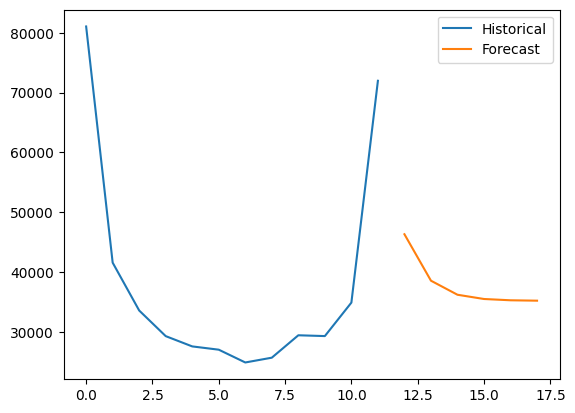

In [47]:
plt.plot(monthly["Revenue"], label="Historical")
plt.plot(range(len(monthly), len(monthly)+6), forecast, label="Forecast")
plt.legend()
plt.show()

In [48]:
monthly["lag1"] = monthly["Revenue"].shift(1)
monthly["lag2"] = monthly["Revenue"].shift(2)

monthly = monthly.dropna()

In [49]:
from sklearn.model_selection import train_test_split

X_ts = monthly[["lag1", "lag2"]]
y_ts = monthly["Revenue"]

X_train_ts, X_test_ts, y_train_ts, y_test_ts = train_test_split(
    X_ts, y_ts, test_size=0.2, shuffle=False
)

xgb_ts = XGBClassifier()  

In [50]:
monthly["Revenue_worst_case"] = monthly["Revenue"] * 0.95

C:\Users\User\AppData\Local\Temp\ipykernel_22436\2302303770.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthly["Revenue_worst_case"] = monthly["Revenue"] * 0.95


telecom-churn-forecast/
│
├── data/
│   ├── raw/
│   │   └── WA_Fn-UseC_-Telco-Customer-Churn.csv
│   │
│   └── processed/
│       ├── cleaned_data.csv
│       └── model_ready_data.csv
│
├── notebooks/
│   ├── 01_eda.ipynb
│   ├── 02_feature_engineering.ipynb
│   ├── 03_modeling_and_profit.ipynb
│   └── 04_revenue_forecast.ipynb
│
├── src/
│   ├── data_preprocessing.py
│   ├── feature_engineering.py
│   ├── modeling.py
│   ├── profit_simulation.py
│   ├── forecasting.py
│   └── utils.py
│
├── models/
│   ├── xgb_churn_model.pkl
│   └── revenue_forecast_model.pkl
│
├── dashboard/
│   └── app.py
│
├── reports/
│   ├── business_summary.pdf
│   └── figures/
│
├── requirements.txt
├── README.md
└── .gitignore